<a href="https://colab.research.google.com/github/VenkataJanga/AQI_Project/blob/master/Ridge_and_Lasso_Regression_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso Regression

## Load the libraries

In [0]:
import numpy as np  #used for algebra calculations
import pandas as pd #  used for preprocessig - data load,  analysis and manipulations
from matplotlib import pyplot as plt # used for visualization
import seaborn as sns #used for statistical visualizationn
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv("/content/drive/My Drive/ML_Dataset/Real_Combine.csv")

In [19]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [23]:
data.isnull().sum()

T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
PM 2.5    120
dtype: int64

In [0]:
data = data.dropna()

In [25]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [26]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.969692,0.960779,-0.883443,-0.546325,0.604547,0.335005,0.289445,-0.628191
TM,0.969692,1.000000,0.902383,-0.833218,-0.620813,0.601281,0.329173,0.301372,-0.579197
Tm,0.960779,0.902383,1.000000,-0.904784,-0.352953,0.533086,0.323114,0.264225,-0.662904
SLP,-0.883443,-0.833218,-0.904784,1.000000,0.314829,-0.449144,-0.352967,-0.301980,0.605864
H,-0.546325,-0.620813,-0.352953,0.314829,1.000000,-0.527889,-0.409985,-0.376790,0.246956
VV,0.604547,0.601281,0.533086,-0.449144,-0.527889,1.000000,0.425107,0.357665,-0.724094
V,0.335005,0.329173,0.323114,-0.352967,-0.409985,0.425107,1.000000,0.758676,-0.422522
VM,0.289445,0.301372,0.264225,-0.301980,-0.376790,0.357665,0.758676,1.000000,-0.353890
PM 2.5,-0.628191,-0.579197,-0.662904,0.605864,0.246956,-0.724094,-0.422522,-0.353890,1.000000


In [27]:
# split the independent and dependent features
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(X.shape, y.shape)

(611, 8) (611,)


Comparision Linear, Ridge, Lasso Regressions

# Linear Regression

In [0]:
from sklearn.model_selection import cross_val_score
lr_reg_model = LinearRegression()

In [29]:
mse = cross_val_score(lr_reg_model, X, y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-2444.0945230244206


# Ridge Regression

In [36]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {"alpha":[1e-10,1e-8,1e-6,1e-4,1e-2,1,2,4,6,8,10,15,20,25,30,35,40,45,50,55,100]}
ridge_reg_model = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg_model.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 2, 4,
                                   6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [37]:
print(ridge_reg_model.best_estimator_)
print(ridge_reg_model.best_params_)
print(ridge_reg_model.best_score_)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
{'alpha': 4}
-2440.5520302543023


# Lasso Regression

In [41]:
lasso = Lasso()
parameters = {"alpha":[1e-10,1e-8,1e-6,1e-4,1e-2,1,2,4,6,8,10,15,20,25,30,35,40,45,50,55,100]}
lass_reg_model = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error',cv=5)
lass_reg_model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314457.7318176702, tolerance: 366.9741926225949
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94714.92351903801, tolerance: 320.7234022480686
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249678.96837346215, tolerance: 359.1211028888321
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372683.21668735

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 2, 4,
                                   6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(lass_reg_model.best_estimator_)
print(lass_reg_model.best_params_)
print(lass_reg_model.best_score_)

Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 1e-10}
-2442.7793467587744


# Model Evaluation

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
prediction = lass_reg_model.predict(X_test)

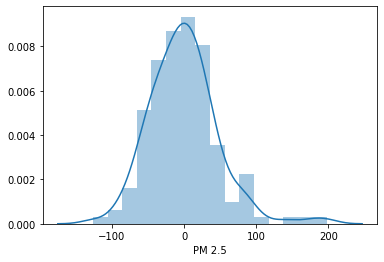

In [46]:
sns.distplot(y_test - prediction)

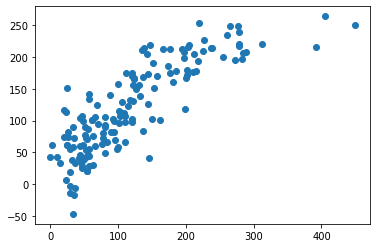

In [47]:
plt.scatter(y_test,prediction)

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
print("Mean Absolute Error {}".format(mae))
print("Mean Aquared Error {}".format(mse))
print("Roor Mean Squared Error {}".format(rmse))

Mean Absolute Error 35.48755292601106
Mean Aquared Error 2270.4102098465796
Roor Mean Squared Error 47.64882170470304


In [0]:
import pickle
file = open("Lasso_regression_model.pkl","wb")

pickle.dump(lass_reg_model,file)